# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


In [9]:
?cifar100

# 資料準備

In [10]:
'''
 This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. 
 There are 500 training images and 100 testing images per class. 
 The 100 classes in the CIFAR-100 are grouped into 20 superclasses. 
 Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
 '''
# Load fine lable (100 classes)
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data(label_mode='fine')

In [11]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
x_img_train.shape

(50000, 32, 32, 3)

In [6]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
x_img_test[0]

array([[[199, 215, 249],
        [196, 211, 244],
        [195, 210, 243],
        ...,
        [216, 231, 250],
        [217, 231, 250],
        [224, 234, 252]],

       [[197, 210, 239],
        [195, 208, 238],
        [195, 210, 240],
        ...,
        [231, 243, 250],
        [233, 243, 250],
        [241, 245, 253]],

       [[222, 226, 246],
        [213, 220, 242],
        [209, 219, 243],
        ...,
        [243, 250, 251],
        [244, 249, 251],
        [250, 250, 253]],

       ...,

       [[ 72,  73,  99],
        [ 71,  74, 102],
        [ 74,  78, 108],
        ...,
        [220, 208, 217],
        [183, 168, 181],
        [155, 141, 150]],

       [[ 72,  75, 104],
        [ 76,  81, 111],
        [ 84,  89, 122],
        ...,
        [222, 212, 220],
        [187, 174, 192],
        [145, 132, 149]],

       [[ 80,  85, 118],
        [ 84,  90, 123],
        [ 85,  92, 127],
        ...,
        [217, 207, 215],
        [207, 194, 211],
        [176, 164, 183]]

In [12]:
# x_img_test[0]: first picture
# x_img_test[0][0]: first picture, x=0
# x_img_test[0][0][0]: first picture, x=0, y=0. Also means 1st pixel with (R,G,B)
# x_img_test[0][0][0][0]: means R of first pixel

In [13]:
y_label_test.shape

(10000, 1)

In [14]:
y_label_test[:5]

array([[49],
       [33],
       [72],
       [51],
       [71]])

In [24]:
# Sample from Cifar10
#label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
#            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

# Predefined ?

CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

label_dict={}
for i, cls in enumerate(CIFAR100_LABELS_LIST):
    # print (f'i={i},cls={cls}')
    label_dict.update({i : cls})
    
label_dict

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    # gcf: Get Current Figure
    fig = plt.gcf()
    fig.set_size_inches(10, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

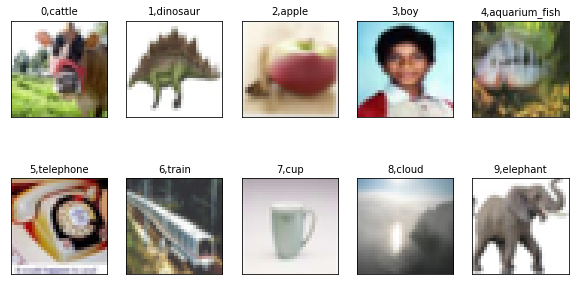

In [26]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [27]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [28]:
# Show first pixel
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [29]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [30]:
# Normalize R,G,B to 0.0 ~ 1.0
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [31]:
y_label_train.shape

(50000, 1)

In [32]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [33]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [34]:
y_label_train_OneHot.shape

(50000, 100)

In [35]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.